# Initial Data Loading

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("../data/movie_ratings.csv")
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime|Film-Noir|Mystery|Thriller,1998
2,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994.0,1990.0,Children|Comedy,1997
3,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994.0,1990.0,Drama|Romance|War|Western,1997
4,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997.0,1990.0,Crime|Drama,1998


## Exploring the data
- Checking the column names.
- Checking data types.
- Checking movie data such as genre, count, etc.

In [61]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      100000 non-null  int64  
 1   movie_id     100000 non-null  int64  
 2   rating       100000 non-null  int64  
 3   timestamp    100000 non-null  object 
 4   age          100000 non-null  int64  
 5   gender       100000 non-null  object 
 6   occupation   100000 non-null  object 
 7   zip_code     100000 non-null  object 
 8   title        100000 non-null  object 
 9   year         99970 non-null   float64
 10  decade       99970 non-null   float64
 11  genres       100000 non-null  object 
 12  rating_year  100000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 9.9+ MB
None
            user_id       movie_id         rating            age  \
count  100000.00000  100000.000000  100000.000000  100000.000000   
mean      462.48475     425.530130       3

## Data Cleaning & Preparation

- The `decade` column is converted to integer values to remove decimals. Invalid entries are replaced with `NaN` to prevent errors in later analysis.  

- A copy of the original dataframe is created, and the `genres` column is split into separate rows for accurate representation.  
- The data is then grouped by genre and rating to prepare it for visualization.  

- The `n` threshold set to 1000 in order to avoid noisy data, ensuring the results remain cohesive.
- A query is run within the grouped data with the results set to the `genre_stats` dataframe.

In [62]:
df['decade'] = pd.to_numeric(df['decade'], errors='coerce').astype('Int64')
df_genres=df.copy()

df_genres['genres'] = df_genres['genres'].str.split('|')
df_genres=df_genres.explode('genres')
df_genres.head()



genre_stats = (
    df_genres.groupby('genres')['rating']
    .agg(['mean','count'])
    .query('count >= 1000')
    .sort_values('mean', ascending=False)
    .reset_index()
)

# Average Rating by Movie Genre

#### Film-Noir has the highest viewer satisfaction with an average rating of 3.9. War and Drama, are 2nd and 3rd with average ratings of 3.8 and 3.7 respectively.

      genres      mean  count
0  Film-Noir  3.921523   1733
1        War  3.815812   9398
2      Drama  3.687379  39895
3    Mystery  3.638132   5245
4      Crime  3.632278   8055


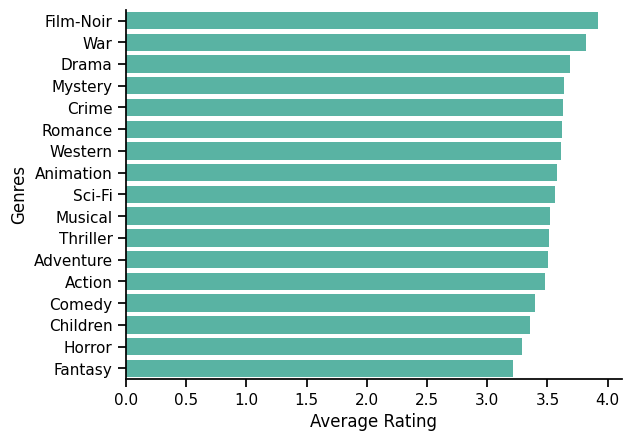

In [63]:
chart_1= sns.barplot(
    data=genre_stats,
    x='mean',
    y='genres',
    color=sns.color_palette("mako", 3)[2]
)

chart_1.set_xlabel("Average Rating")
chart_1.set_ylabel("Genres")


sns.despine()
print(genre_stats.head())

# Rating Variance Across the Decades

### The '90s sees a monumental increase in viewer ratings, which follows in line with the adoption of home entertainment world wide.

Text(0, 0.5, 'Count')

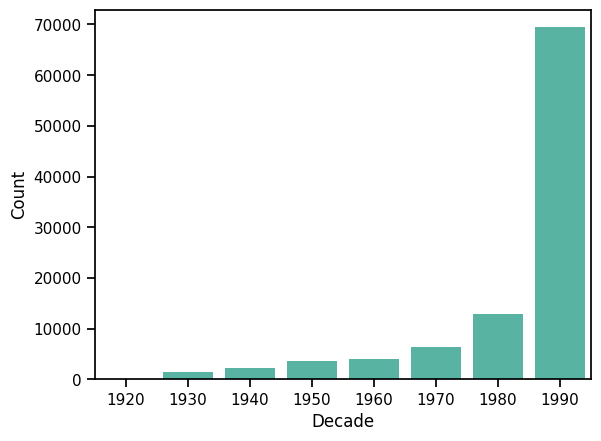

In [64]:
decade_stats = (
    df.groupby('decade')['rating']
    .agg(['mean','count'])
    .reset_index()
    .sort_values('decade')
)

# Ratings count by decade
chart_2 = sns.barplot(data=decade_stats, x='decade', y='count', color=sns.color_palette("mako", 3)[2])
chart_2.set_xlabel("Decade")
chart_2.set_ylabel("Count")

# Correlation Between Count of Ratings & Average Rating

### Movies that receive a higher number of ratings tend to show a lower average rating.


Text(0, 0.5, 'Mean Rating')

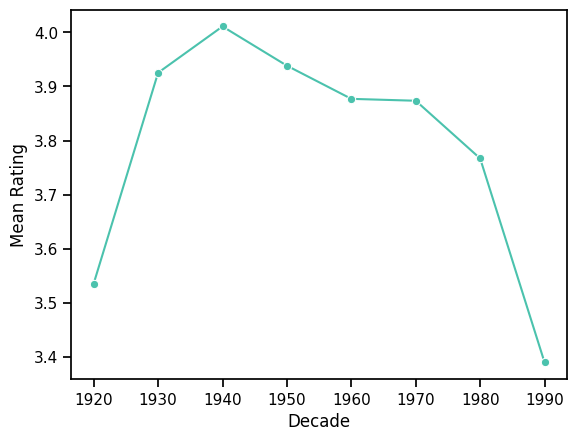

In [65]:
chart_3 = sns.lineplot(data=decade_stats, x='decade', y='mean', marker='o', color=sns.color_palette("mako", 3)[2])
chart_3.set_xlabel("Decade")
chart_3.set_ylabel("Mean Rating")

# The Best Rated Movies

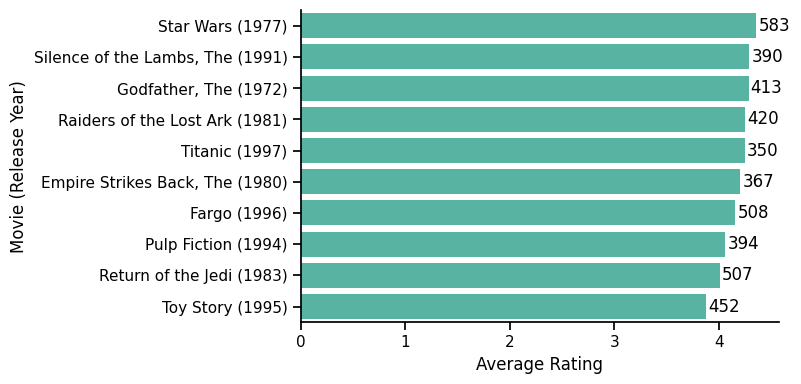

In [66]:
movie_stats = (
    df.groupby(['movie_id', 'title'])['rating']
    .agg(mean='mean', count='count')
    .query('count >= 350')
    .sort_values(['mean', 'count'], ascending=[False, False])
    .head(10)
    .reset_index()
)

chart_4 = sns.catplot(
    data=movie_stats,
    x = 'mean',
    y = 'title',
    kind = 'bar',
    height = 4,
    aspect = 2,
    color=sns.color_palette("mako", 3)[2]
)

chart_4.set_axis_labels("Average Rating", "Movie (Release Year)")

# Count labels
for i, (val, cnt) in enumerate(zip(movie_stats['mean'], movie_stats['count'])):
    chart_4.ax.text(val + 0.02, i, f"{cnt}", va='center')

# Genre Preference by Age Groups

This heatmap compares how different age groups rate popular genres : `Film-Noir`, `War`, and `Drama`.  
Darker shades represent higher average ratings, while lighter shades represent lower ones.  



genres     Film-Noir   War  Drama
age_group                        
<18             3.50  3.86   3.59
18-24           3.79  3.79   3.64
25-34           3.87  3.75   3.65
35-44           3.99  3.86   3.74
45-49           4.14  3.84   3.80
50-55           3.98  3.98   3.73
56+             4.04  3.90   3.74


/var/folders/0w/50r69_854fg240hvk25rffcm0000gn/T/ipykernel_6058/3681418299.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_df.groupby(['age_group', 'genres'])['rating']


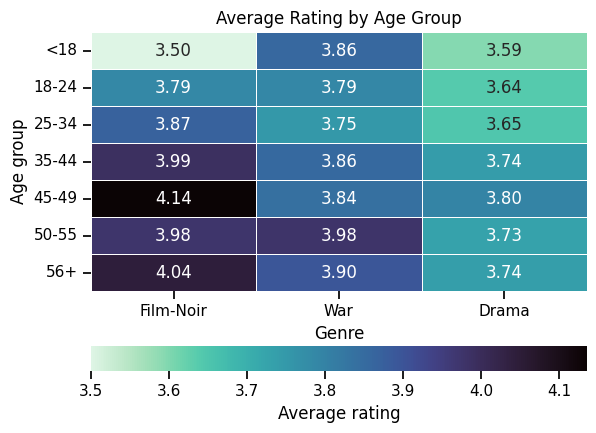

In [67]:
popular_genres = ['Film-Noir', 'War', 'Drama']

age_bins = [0, 17, 24, 34, 44, 49, 55, 120]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

# Cleaning index and age data types
df_genres = df_genres.reset_index(drop=True)

# Converting age into integer and remove inconsistent data
filtered_df = df_genres.loc[df_genres['genres'].isin(popular_genres)].copy()
filtered_df['age'] = pd.to_numeric(filtered_df['age'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['age'])

# Age bucketing
filtered_df['age_group'] = pd.cut(
    filtered_df['age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True,
    right=True
)

# Mean rating by age_group x genre
heat_df = (
    filtered_df.groupby(['age_group', 'genres'])['rating']
    .mean()
    .reset_index()
    .pivot(index='age_group', columns='genres', values='rating')
    .reindex(index=age_labels, columns=popular_genres)
)

print(heat_df.round(2))

chart_5 = sns.heatmap(
    heat_df,
    cmap='mako_r',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Average rating', 'orientation' : 'horizontal'},
)

chart_5.set_yticklabels(chart_5.get_yticklabels(), rotation=0)
chart_5.set_xlabel("Genre")
chart_5.set_ylabel("Age group")
chart_5.set_title("Average Rating by Age Group")
sns.despine(left=True, bottom=True)
